# Cleveland's Heart Disease prediction
#### using Bayesian Network

In [60]:
import pandas as pd
from pgmpy.models import BayesianModel
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [61]:
attributes="Age,Sex,Chest pain,Rest BP,Cholestrol,FBS,Rest ECG,Thalach,Exang,Old peak,Slope,CA,Thal,Diagnosis"
attributes=attributes.split(",")

print(attributes)


['Age', 'Sex', 'Chest pain', 'Rest BP', 'Cholestrol', 'FBS', 'Rest ECG', 'Thalach', 'Exang', 'Old peak', 'Slope', 'CA', 'Thal', 'Diagnosis']


In [62]:
df=pd.read_csv('/Users/rudra_sarkar/Documents/jupyter practice projects/processed.cleveland.data',names=attributes)
df.head()

,Age,Sex,Chest pain,Rest BP,Cholestrol,FBS,Rest ECG,Thalach,Exang,Old peak,Slope,CA,Thal,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<AxesSubplot:>

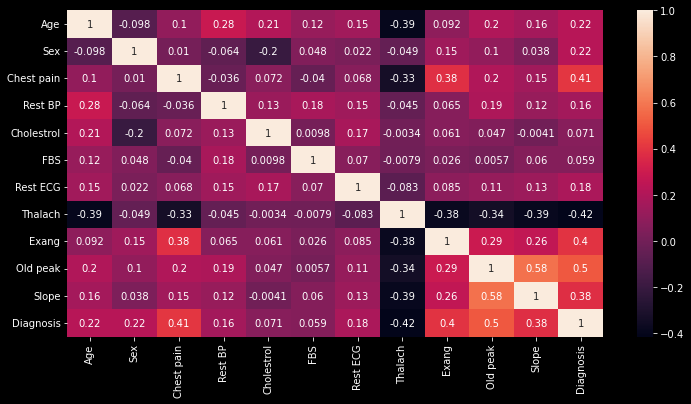

In [63]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(),annot=True)

In [64]:
model=BayesianModel([('Age','Sex'),('Sex','Chest pain'),('Chest pain','Diagnosis')])
model.fit(df)


/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [67]:
from pgmpy.inference import VariableElimination
infer=VariableElimination(model)
q=infer.query(['Diagnosis'],evidence={'Sex':1})
print(q)


+--------------+------------------+
| Diagnosis    |   phi(Diagnosis) |
+==============+==================+
| Diagnosis(0) |           0.5240 |
+--------------+------------------+
| Diagnosis(1) |           0.1873 |
+--------------+------------------+
| Diagnosis(2) |           0.1238 |
+--------------+------------------+
| Diagnosis(3) |           0.1194 |
+--------------+------------------+
| Diagnosis(4) |           0.0455 |
+--------------+------------------+
